<a href="https://colab.research.google.com/github/fbeilstein/presentations/blob/master/presentation_for_October_31_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title ##Back propagation (how to get gradient)

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_1.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_2.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_3.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_4.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_5.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_6.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_7.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_8.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_9.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_10.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_11.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_12.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_13.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_14.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_15.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_16.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_17.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_18.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_19.jpg" width="750px">
`,
`
  <img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/back_prop/slide_20.jpg" width="750px">
`
  ]
)
</script>

In [ ]:
#@title  ##Single neuron operation

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/forward.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/backward.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/one_neuron_bp/backward_two_outs.jpg" width="750px">`
  ]
)
</script>

In [ ]:
#@title ##NN example

%%html
<link rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_1.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_2.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_3.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_4.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_5.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_6.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_7.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_8.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_9.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_10.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_11.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_12.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_13.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_14.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_15.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_16.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_17.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_18.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_19.jpg" width="750px">`,
`<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/nn_example/slide_20.jpg" width="750px">`
  ]
)
</script>

# Example SimpleRandomNet

(1347, 8, 8, 1) (1347, 10) 1.0


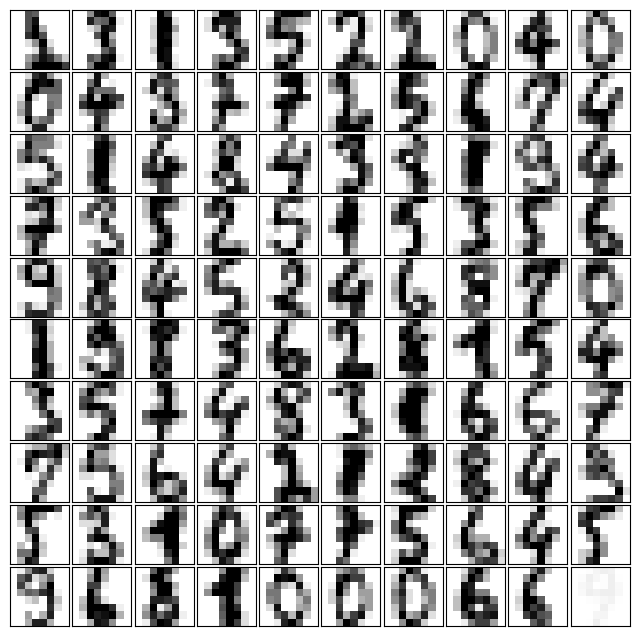

In [118]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()
X_all = (digits.data.reshape(digits.data.shape[0], 8, 8, 1) / 16.0).astype(float)  # / 256.0

X_train, X_test, y_train, y_test =  train_test_split(X_all,
                                                     digits.target,
                                                     train_size=0.75,
                                                     shuffle=True)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

def plot_digits(data):
  fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(hspace=0.05, wspace=0.05)
  for i, axi in enumerate(ax.flat):
    im = axi.imshow(data[i,:,:,0], cmap='binary')
  im.set_clim(0, 16)

plot_digits(X_train)
print(X_train.shape, y_train.shape, np.max(X_train))
X_trainT = torch.tensor(np.transpose(X_train, (0, 3, 1, 2)), dtype=torch.float32)
y_trainT = torch.tensor(y_train, dtype=torch.float32)
X_testT = torch.tensor(np.transpose(X_test, (0, 3, 1, 2)), dtype=torch.float32)
y_testT = torch.tensor(y_test, dtype=torch.float32)

**Categorical cross-entropy** loss function $L$ is computed as follows
$$
L = \sum_i t_i \ln(s_i),
$$
where $t_i$ are truth values and $s_i$ are **softmax** outputs
$$
\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \text{ for } i = 1, \dotsc, K \text{ and } \mathbf{z} = (z_1, \dotsc, z_K) \in \mathbb{R}^K.
$$
In our case $t_i$ are either $0$ or $1$ (see `to_categorical` function). We may have used `sparse_crossentropy`, same function different class encoding.

In [ ]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_test, axis=1), #true
                 np.argmax(model.predict(X_test), axis=1)   #predicted
                )

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[43,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 41,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 43,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  0,  0, 36,  1,  1],
       [ 0,  1,  0,  1,  0,  1,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 41]])

In [119]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class RandNet(nn.Module):
  def __init__(self, input_shape, nb_classes):
    super(RandNet, self).__init__()
    self._out_channels = 6
    self._conv = nn.Conv2d(in_channels=1, out_channels=self._out_channels, kernel_size=3, padding=1, stride=1)
    self._pool = nn.AvgPool2d(kernel_size=2, stride=2)
    self._flatten = nn.Flatten()
    self._fc = nn.Linear(input_shape[1] // 2 * input_shape[2] // 2 * self._out_channels, nb_classes)

  def forward(self, x):
    conv_out = torch.tanh(self._conv(x))
    pool_out = self._pool(conv_out)
    flat_out = self._flatten(pool_out)
    out = F.softmax(self._fc(flat_out), dim=1)
    return conv_out, pool_out, flat_out, out

model = RandNet(X_trainT[0].shape, 10)
summary(model, input_size=X_trainT[0].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 6, 8, 8]              60
         AvgPool2d-2              [-1, 6, 4, 4]               0
           Flatten-3                   [-1, 96]               0
            Linear-4                   [-1, 10]             970
Total params: 1,030
Trainable params: 1,030
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [120]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Example for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 4000
for epoch in range(num_epochs):
  model.train()
  optimizer.zero_grad()
  _, _, _, outputs = model(X_trainT)
  loss = criterion(outputs, y_trainT)
  loss.backward()
  optimizer.step()
  epoch_loss = loss.item()
  if epoch % 100 == 0:
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/4000, Loss: 2.3028
Epoch 101/4000, Loss: 2.1793
Epoch 201/4000, Loss: 1.8551
Epoch 301/4000, Loss: 1.7240
Epoch 401/4000, Loss: 1.6692
Epoch 501/4000, Loss: 1.6397
Epoch 601/4000, Loss: 1.6223
Epoch 701/4000, Loss: 1.6026
Epoch 801/4000, Loss: 1.5526
Epoch 901/4000, Loss: 1.5382
Epoch 1001/4000, Loss: 1.5288
Epoch 1101/4000, Loss: 1.5218
Epoch 1201/4000, Loss: 1.5162
Epoch 1301/4000, Loss: 1.5116
Epoch 1401/4000, Loss: 1.5076
Epoch 1501/4000, Loss: 1.5041
Epoch 1601/4000, Loss: 1.5009
Epoch 1701/4000, Loss: 1.4981
Epoch 1801/4000, Loss: 1.4955
Epoch 1901/4000, Loss: 1.4932
Epoch 2001/4000, Loss: 1.4910
Epoch 2101/4000, Loss: 1.4890
Epoch 2201/4000, Loss: 1.4871
Epoch 2301/4000, Loss: 1.4854
Epoch 2401/4000, Loss: 1.4838
Epoch 2501/4000, Loss: 1.4823
Epoch 2601/4000, Loss: 1.4809
Epoch 2701/4000, Loss: 1.4797
Epoch 2801/4000, Loss: 1.4786
Epoch 2901/4000, Loss: 1.4775
Epoch 3001/4000, Loss: 1.4765
Epoch 3101/4000, Loss: 1.4755
Epoch 3201/4000, Loss: 1.4746
Epoch 3301/4000, Loss:

In [121]:
# Get intermediate outputs
conv_out, pool_out, flat_out, model_out = model(X_trainT)

print("Convolution Output:", conv_out.shape)
print("Pooling Output:", pool_out.shape)
print("Flatten Output:", flat_out.shape)
print("Final Output:", model_out.shape)

Convolution Output: torch.Size([1347, 6, 8, 8])
Pooling Output: torch.Size([1347, 6, 4, 4])
Flatten Output: torch.Size([1347, 96])
Final Output: torch.Size([1347, 10])


In [122]:
validation_loader = torch.utils.data.DataLoader(dataset=list(zip(X_testT, y_testT)), batch_size=batch_size, shuffle=False)

def validate_model(model, validation_loader, criterion):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in validation_loader:
            # Forward pass
            _, _, _, outputs = model(inputs)

            # Calculate the loss
            loss = criterion(outputs, labels.argmax(dim=1))
            val_loss += loss.item()

            # Calculate the number of correct predictions
            predicted = torch.argmax(outputs, dim=1)
            correct_predictions += (predicted == labels.argmax(dim=1)).sum().item()
            total_samples += labels.size(0)

    # Calculate average loss and accuracy
    avg_loss = val_loss / len(validation_loader)
    accuracy = correct_predictions / total_samples
    print(f'Validation Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')
    return avg_loss, accuracy

validate_model(model, validation_loader, criterion)

Validation Loss: 1.4953, Accuracy: 0.9711


(1.4952564984560013, 0.9711111111111111)

In [ ]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_test, axis=1), #true
                 np.argmax(model.predict(X_test), axis=1)   #predicted
                )

INPUT:


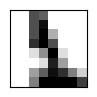

CONVOLUTION:


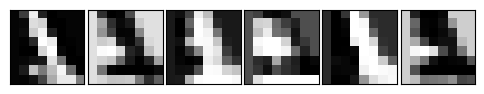

AVERAGE POOL:


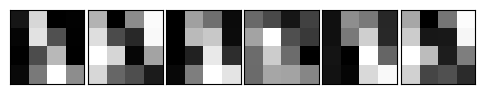

OUTPUT:


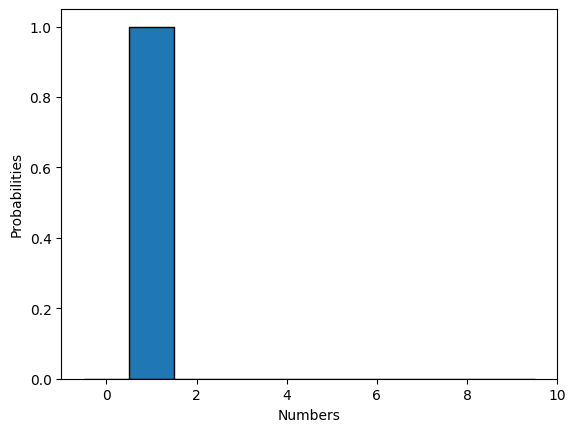

In [145]:
idx = 0
conv_outs, pool_outs, flat_outs, outputs = model(X_trainT)

print("INPUT:")
fig, ax = plt.subplots(1, 1, figsize=(1, 1), subplot_kw=dict(xticks=[], yticks=[]))
ax.imshow(np.transpose(X_trainT[idx], (1, 2, 0)), cmap='binary')
plt.show()

print('CONVOLUTION:')
fig, ax = plt.subplots(1, 6, figsize=(6, 1), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
  axi.imshow(conv_outs.detach().numpy()[idx, i, :, :], cmap='binary')
plt.show()

print('AVERAGE POOL:')
fig, ax = plt.subplots(1, 6, figsize=(6, 1), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
  axi.imshow(pool_outs.detach().numpy()[idx, i, :, :], cmap='binary')
plt.show()

print('OUTPUT:')
bin_edges = [x - 0.5 for x in range(11)]
bar_heights = outputs[idx].detach().numpy()
bar_widths = [1] * 10
plt.bar(bin_edges[:-1], bar_heights, width=bar_widths, align='edge', edgecolor='black')
plt.xlabel('Numbers')
plt.ylabel('Probabilities')
plt.show()